
# TP#1 : Fashion MNIST dataset

---



> This lab session in an introduction to feed-forward neural network with pytorch. We use the dataset Fashion-MNIST (see for more details this website https://github.com/zalandoresearch/fashion-mnist). The dataset contains 60000 and 10000 images for respectively training and testing. Each image is 28x28 pixels, for a total of 784 per image.  An image is presented to the neural network as a flat vector of 784 component. 

> In this lab session, you will experiment different kind of feed-forward networks, starting with simple models,  and then increasing their complexity. 

> First load and test python and pytorch. Your notebook is supposed to work with python 3 (see the top right corner of the notebook).



# Libraries
---

In [ ]:
import torch as th
import torch.nn as nn

import numpy as np
import pickle
import math
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
print(th.__version__) # should be greater or equal to 1.0

from time import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


1.11.0+cu113


## Auxiliary functions


In [ ]:
def plt_learning_curves(loss_hist_train, loss_hist_cv, accuracy_hist, Nepoch=None, lr=None):
  fig, axs = plt.subplots(1, 2, figsize=(14,4))

  axs[0].plot(loss_hist_train, label='Training', color='black') # Training set loss is displayed in the first image (red)
  axs[0].plot(loss_hist_cv, label='Validation', color='red') # Validation set loss is displayed in the first image (black)
  axs[0].set_title('Loss History') # Title and axis title
  axs[0].set(xlabel = 'Epoch')
  axs[0].set(ylabel = 'Loss')
  axs[0].legend()

  axs[1].plot(accuracy_hist, color='black') # Accuracy history is displayed in a second figure
  axs[1].set_title('Accuracy History') # Title and axis title
  axs[1].set(xlabel = 'Epoch')
  axs[1].set(ylabel = 'Normalized Accuracy')

  # Defining the superior title
  title = 'Epochs = ' + str(Nepoch) + ', Learning Rate = ' + str(lr)
  fig.suptitle(title)

  # Printing both images
  plt.show()

In [ ]:
def graph_labels(title, timer=False):
  axs[0].set_title('Loss History') # Title and axis title
  axs[0].set(xlabel = 'Epoch')
  axs[0].set(ylabel = 'Loss')
  axs[0].legend()

  axs[1].set_title('Accuracy History') # Title and axis title
  axs[1].set(xlabel = 'Epoch')
  axs[1].set(ylabel = 'Normalized Accuracy')
  axs[1].legend()

  fig.suptitle(title) # Defining the superior title

# Dataset
---

In [ ]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset (Fashion MNIST)
import gzip
fp = gzip.open('/content/drive/MyDrive/Colab Notebooks/fashion-mnist.pk.gz','rb')
allXtrain, allYtrain, Xtest, Ytest, classlist  = pickle.load(fp) 

> **Important**: The dataset is split in two parts, the training set and the test set.
For thorough study and evaluation of machine learning models, a good practice is to consider the data in 3 parts: 
- the **training** set to learn the model parameters;
- the **validation** set to tune the hyper parameters and some design choices (the number and the size of the hidden layers, the dropout probability, ...);
- the **test** set to evaluate the model at the end. 


> For the moment, we leave the test set and focus on the training set. 
To spare time, we will only consider the first 20000 images for training in the following set of experiments. And we also build a validation set to compare the results we obtain with different hyper-parameters. 




In [ ]:
# Selecting the train and validation set
Xtrain, Ytrain  = allXtrain[:20000], allYtrain[:20000]
Xvalid, Yvalid  = allXtrain[20000:30000], allYtrain[20000:30000]

# Printing the shape of both sets
print("Training shape:  " ,Xtrain.shape)
print("Validation shape:" ,Xvalid.shape)

Training shape:   torch.Size([20000, 784])
Validation shape: torch.Size([10000, 784])


> To better understand the dataset explore the training set made of Xtrain and Ytrain. 
- Look at the dimension and type of the tensors
- Print also the classlist variable. 
- Then look at some example to check consistency. 

> For that purpose you can plot an image like this: 

(20000, 784)


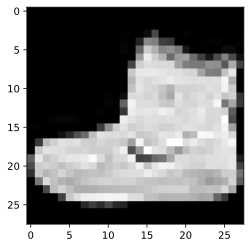

In [ ]:
#Transforming a tensor into a numpy array, then reshaping it and finally plotting
plt.imshow(Xtrain[0].numpy().reshape(28,28) , matplotlib.pyplot.cm.gray)
#Expliciting the shape of the array
print(Xtrain.numpy().shape)



> As a first overview of the dataset, we can do a PCA (in 2D) of the training set. The following image represents the result: 

<img src="https://allauzen.github.io/assets/figs/pca-fashion-10-classes.png" 
    style="width:400px; margin:0px auto;display:block">



# Feed forward neural network
---


> A feedforward model can rely on the pytorch module *Sequential*. 
A *Sequential* module is a container of ordered modules: the first one takes input data and its output is given to feed the second module, and so on. 

> **Note:** In pytorch, modules assumed Tensors as input. The input Tensor can contain just one input (online mode) or several inputs (mini-batch). The first dimension of the input Tensor corresponds to the mini-batch, and the second one to the dimension of the example to feed in. For example, with a mini-batch of size B and an image of D pixels, the input Tensor should be of shape (B,D), even if B=1 for one exemple. 


## Shallow network

> Let start with a simple model with one input layer and one output layer (without hidden layers). Please refer to the examples provided previously, and propose an implementation of this linear model using the *Sequential* module as container.  To write the model, we must consider the fact that the model is trained in order to maximize the Log-likelihood on the training data. If you look at  https://pytorch.org/docs/stable/nn.html, the documentation of the NNet package of pytorch, there is a section on the loss functions. 

> Two of the proposed loss function can be used for our purpose. The choice of one of them implies the choice of the activation function at the output layer. 

> - What are these two possible choices ? 


> Make a choice and replace the "None" in the following cell:

In [ ]:
# Dimensions of input and output
D_in = 784
D_out= 10

# Creating the model
model =  nn.Sequential(
    nn.Linear(D_in, D_out), # Initially, it applies a linear transformation to the incoming data, i.e, y = w0 + w*x'
    nn.LogSoftmax(dim=1) # Then, we need to apply the LogSoftmax as activation function (to add nonlinearity)
    ) 

loss_function = nn.NLLLoss() # The loss function is them calculated with NLLLoss, which is a good function for LogSoftMax

# Remark: We could use CrosssEntropyLoss with a Softmax activation layer instead, but for our purpose, LogSoftMax is more stable.
# So, the two possible choices are [LogSoftMax + NLLLoss] or [Softmax + CrosssEntropyLoss]


> Then test the code on a minibatch of B examples. The code below corresponds to a prediction on a single image and then on 3 images. Look at the results, their shapes and values. Is it consistent with what you expect ? 

In [ ]:
B = 1 # Number of images in the batch
i = 0 # Initialisation point

pred = model(Xtrain[i:i+B]) # Applying the model on the figure and saving its prediction
print("Single image :", pred.shape) # Printing the prediction tensor
print(pred, '\n')

# Doing the same thing with a 3 images batch
B = 3
i = 0
pred = model(Xtrain[i:i+B])
print("Three images :", pred.shape)
print(pred)

Single image : torch.Size([1, 10])
tensor([[   0.0000,  -47.6814, -285.6512, -272.9234, -209.9281, -223.2482,
         -165.9062, -151.8377, -219.0061, -225.0803]],
       grad_fn=<LogSoftmaxBackward0>) 

Three images : torch.Size([3, 10])
tensor([[   0.0000,  -47.6814, -285.6512, -272.9234, -209.9281, -223.2482,
         -165.9062, -151.8377, -219.0061, -225.0803],
        [ -41.6156,  -50.2209, -197.2648,  -37.1132,  -94.8557,    0.0000,
         -193.0984, -101.6630, -132.8314, -144.1199],
        [   0.0000,  -68.2913,  -63.1234,  -81.7434,  -64.6697,  -43.6023,
         -105.5114, -102.6887,  -51.4439, -125.5173]],
       grad_fn=<LogSoftmaxBackward0>)




---
> *As all values belongs to $]-∞,0]$ and and the output dimension is 10, everything is consistent*
---



> Do the same with the loss function. 

In [ ]:
B = 1
i = 1
pred = model(Xtrain[i:i+B])
loss = loss_function(pred, Ytrain[i:i+B]) # Calculating the loss function (NLLLoss)
print(loss)

# The same with a batch of 3 images
B = 3
i = 1
pred = model(Xtrain[i:i+B])
loss = loss_function(pred, Ytrain[i:i+B])
print(loss)

tensor(41.6156, grad_fn=<NllLossBackward0>)
tensor(19.7560, grad_fn=<NllLossBackward0>)


## Online learning  and mini-batch

> We will start by writing the code for training a model. The code should be as generic as possible to handle different kind of model. Afterwards, you will wrap your code in a function. 

> We will use the Adam optimizer with an initial learning rate of 0.001.  

> The following cell contains examples of code that can be useful to train the model:  
- Init. of the model and the optimizer.  
- Ideas the iterate over the dataset in a random order
- Mini-batch processing 
- Forward and backward pass

In [ ]:
### The model, the loss and optimizer

# Model - Linear transformation and activation with LogSoftMax
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))

# Optimizer - Adam algorithm (gradient descent)
optimizer=th.optim.Adam(model.parameters(),lr=0.001)

# Loss - Negative likelihood loss
loss_fn=nn.NLLLoss()

### Mini-batching and shuffle

# Calculating the number of batches
Ntrain = Xtrain.shape[0] 
Nvalid = Xvalid.shape[0]
print("Number of images in training and validation sets: ", Ntrain, ',', Nvalid)
idx = np.arange(Ntrain) # Generate the indices 
batch_size = 200
nbatch = int(Ntrain/batch_size) # Number of batches
print("Batch size: ", batch_size)
print("Number of batches: ", nbatch)

# Shuffling the order of the index
np.random.shuffle(idx) # Random order of indices 
bi = 2 # Random choice
ids = idx[bi*batch_size:(bi+1)*batch_size] # Get indices of batch bi
print("Shape of ids: ", ids.shape)
images = Xtrain[ids]  # Get the images
labels = Ytrain[ids]  # The Labels
optimizer.zero_grad()
logprobs=model(images) # Inference 
loss=loss_fn(logprobs,labels) # Compute the loss
print("Loss function: ",loss)     
loss.backward() # Back propagation
optimizer.step() # Update the parameters
# Note: just for illustration and checking, we can recompute 
# the loss on the same minibatch, but after the update. 
logprobs=model(images) # Inference 
loss=loss_fn(logprobs,labels) # Compute the loss
print("Loss function: ",loss.item()) # better print ! 


Number of images in training and validation sets:  20000 , 10000
Batch size:  200
Number of batches:  100
Shape of ids:  (200,)
Loss function:  tensor(141.2391, grad_fn=<NllLossBackward0>)
Loss function:  77.4381103515625


> Given the previous example, write the "full" training: 
- Init. of everything useful
- The training loop, 
- ... 

> Remember that we need the values of the loss function both on the train and on the validation set. 

In [ ]:
Nepochs = 30
lr = 0.0001

### The model, the loss and optimizer
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))

optimizer=th.optim.Adam(model.parameters(), lr)

loss_fn=nn.NLLLoss()

### Mini-batching and shuffle 
Ntrain = Xtrain.shape[0] 
Nvalid = Xvalid.shape[0]
idx = np.arange(Ntrain) # Generate the indices 
batch_size = 200
nbatch = int(Ntrain/batch_size) # Number of batches
np.random.shuffle(idx) # Random order of indices 

# Lists for learning curves
loss_hist_train = list()
loss_hist_cv = list()
accuracy_list = list()

for n in range(Nepochs):
  for bi in range(nbatch):
    ids = idx[bi*batch_size:(bi+1)*batch_size] # Get indices of minibatch bi
    images = Xtrain[ids]  # Get the images
    labels = Ytrain[ids]  # The Labels
    optimizer.zero_grad()
    logprobs=model(images) # Inference 
    loss=loss_fn(logprobs,labels) # Compute the loss
    loss.backward() # Back Propagation
    optimizer.step() # Update the parameters
  
  # Train loss
  logprobs_train=model(Xtrain) # Inference of the epoch (train)
  loss_train=loss_fn(logprobs_train,Ytrain) # Compute the loss of the epoch (train)
  loss_hist_train.append(loss_train.item())
  print('Train loss:', loss_train.item())

  # Validation
  logprobs_cv=model(Xvalid) # Inference of the epoch (cv)
  loss_cv=loss_fn(logprobs_cv,Yvalid) # Compute the loss of the epoch (cv)
  loss_hist_cv.append(loss_cv.item())

  # Accuracy
  prob_predict, class_predict = logprobs_cv.topk(1)
  accuracy = (class_predict.T == Yvalid).sum().float() / Nvalid
  accuracy_list.append(accuracy)

Train loss: 11.302318572998047
Train loss: 7.863832950592041
Train loss: 6.542736053466797
Train loss: 5.789018630981445
Train loss: 5.282646656036377
Train loss: 4.894098281860352
Train loss: 4.580323219299316
Train loss: 4.269859790802002
Train loss: 3.94753360748291
Train loss: 3.6783008575439453
Train loss: 3.4750561714172363
Train loss: 3.2964370250701904
Train loss: 3.1445069313049316
Train loss: 3.0075697898864746
Train loss: 2.878882646560669
Train loss: 2.763902425765991
Train loss: 2.658710241317749
Train loss: 2.5641911029815674
Train loss: 2.4772772789001465
Train loss: 2.3979742527008057
Train loss: 2.325544834136963
Train loss: 2.258110523223877
Train loss: 2.1936187744140625
Train loss: 2.137836217880249
Train loss: 2.073859691619873
Train loss: 2.0201854705810547
Train loss: 1.9704644680023193
Train loss: 1.921234369277954
Train loss: 1.8740588426589966
Train loss: 1.8317464590072632


> Run the training loop with a batch size of 1 and then of size 200. The difference in terms of computation time should be significant ! We will now only use a batch size of 200. 

> Note that in practice, the learning rate should be adapted to the mini-batch size. 

> Run the previous training code with a batch size of 200 for 30 epochs. We can plot at the results like this


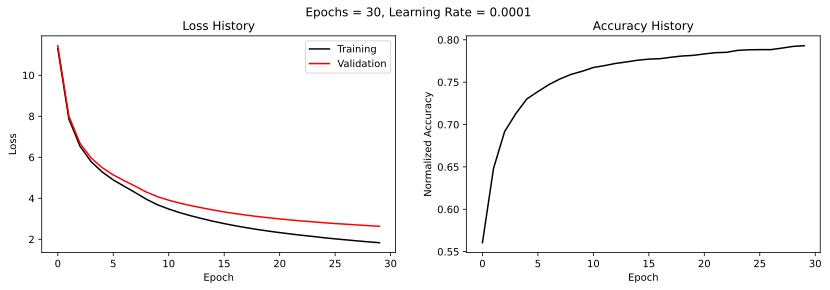

In [ ]:
plt_learning_curves(loss_hist_train, loss_hist_cv, accuracy_list, Nepochs, lr)

## Training wrapper 

> Write a function that wraps what we need to train a model and look at the results. Test it with a new model. 

> Good to notice : the call of  *model(X)* return a 2D tensor. The 2D tensor has a line for every image of the batch. The line of an image has one column per label (here 10). The tensor contains the log-probabilities that the image corresponds to the label of the
column.


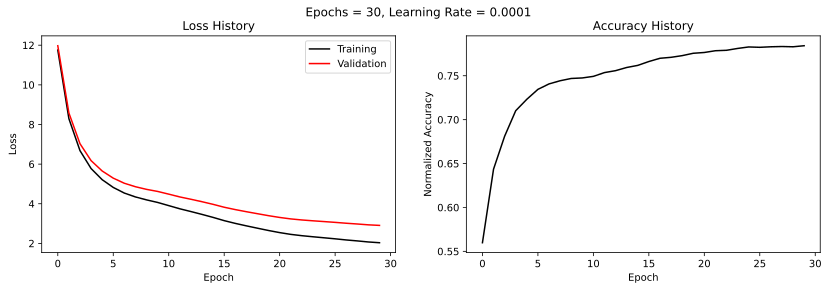

In [ ]:
def train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=30, minibatch=200, verbose=False):
  # The verbose allows you to skip printed information per epoch.
  # The function will only print the best accuracy on the validation
  # and plot the learning curves.

  ### Mini-batching and shuffle 
  Ntrain = Xtrain.shape[0] 
  Nvalid = Xvalid.shape[0]
  idx = np.arange(Ntrain) # Generate the indices 
  nbatch = int(Ntrain/minibatch) # Number of batches
  np.random.shuffle(idx) # Random order of indices 

  # Lists for learning curves
  loss_hist_train = list()
  loss_hist_cv = list()
  accuracy_hist = list()

  tac = time()
  for n in range(epochs):
    for bi in range(nbatch):
      ids = idx[bi*minibatch:(bi+1)*minibatch] # Get indices of minibatch bi
      images = Xtrain[ids]  # Get the images
      labels = Ytrain[ids]  # The Labels
      optimizer.zero_grad()
      logprobs = model(images) # Inference 
      loss=loss_fn(logprobs,labels) # Compute the loss
      loss.backward() # Back Propagation
      optimizer.step() # Update the parameters
    
    # Train loss
    logprobs_train=model(Xtrain) # Inference of the epoch (train)
    loss_train=loss_fn(logprobs_train,Ytrain) # Compute the loss of the epoch (train)
    loss_hist_train.append(loss_train.item())

    # Validation
    with th.no_grad(): # No need to compute the gradient
      model.eval() # Activating the evaluation mode of the model
      logprobs_cv = model(Xvalid) # Inference of the epoch (cv)
      loss_cv=loss_fn(logprobs_cv,Yvalid) # Compute the loss of the epoch (cv)
      loss_hist_cv.append(loss_cv.item())

      # Accuracy
      prob_predict, class_predict = logprobs_cv.topk(1) # Picking the greatest probability (cv)
      accuracy = (class_predict.T == Yvalid).sum().float() / Nvalid # Comparing with the labels
      accuracy_hist.append(accuracy)
    
    model.train() # Returning to training mode
    tic = time()

    if verbose:
      print('Train loss:', loss_train.item(), '\tCV loss:', loss_cv.item())

    time_trainig = tic - tac

  return loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig

# When we create the model, its parameters are initialized.

Nepochs = 30
lr = 0.0001

model = nn.Sequential(nn.Linear(784,10),
                    nn.LogSoftmax(dim=1))
optimizer = th.optim.Adam(model.parameters(), lr)
loss_fn=nn.NLLLoss()

# Note this important to build a new optimizer 
# if we want to have the reference to parameters 
# of the new model ! 
loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, Nepochs)
plt_learning_curves(loss_hist_train, loss_hist_cv, accuracy_hist, Nepochs, lr)

# Neural Network with one hidden layer
---

> Now we have a function to train and evaluate the training process of a neural model, we can explore different configurations. Let start with a neural network with one hidden layer and a Sigmoid activation function on this hidden layer. We set the size of this hidden layer to 50. 

> Write the model using the Sequential module, and train it: 
- for 30 epochs and with lr=0.001 and lr=0.0001
- do the same and raise the number of epoch to 50

> What do you observe ? 

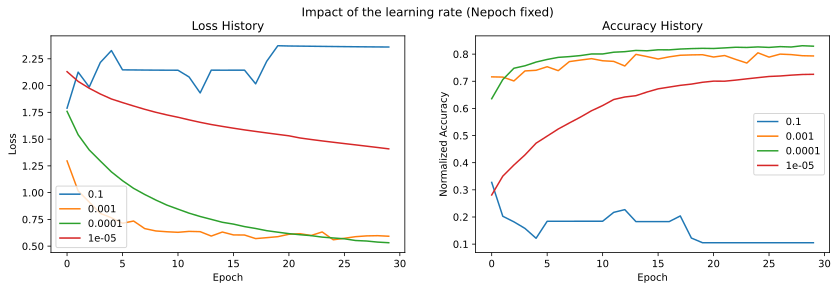

In [ ]:
# Model dimensions
D_in = 784
hidden_layer = 50
D_out= 10

# Figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for lri in [0.1, 0.001, 0.0001, 0.00001]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
  loss_fn = nn.NLLLoss()
  optimizer = th.optim.Adam(model.parameters(),lr=lri)
  loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=30)

  axs[0].plot(loss_hist_cv, label=str(lri)) # Loss plot (cv)
  axs[1].plot(accuracy_hist, label=str(lri)) # Accuracy plot

graph_labels('Impact of the learning rate (Nepoch fixed)')

---
> *We can see that if the learning rate is too big (like 0.1), we risk to have an overshoot, and the model isn't optimized anymore (it doesn't converges).*

> *On the other hand, if we use a learning rate too small, we end by needing more iterations to learn the parameters (the model converges very slowly)*

> *In conclusion, we search a good trade of between theese two effects of the learning rate (0.0001)*

---

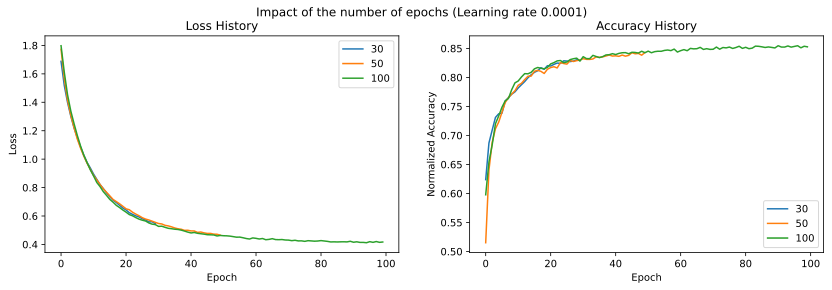

In [ ]:
# Model dimensions
D_in = 784
hidden_layer = 50
D_out= 10

# Figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for Nepoch in [30, 50, 100]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
  loss_fn = nn.NLLLoss()
  optimizer = th.optim.Adam(model.parameters(),lr=0.0001)
  loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

  axs[0].plot(loss_hist_cv, label=str(Nepoch)) # Loss plot (cv)
  axs[1].plot(accuracy_hist, label=str(Nepoch)) # Accuracy plot

graph_labels('Impact of the number of epochs (Learning rate 0.0001)')

---
> *The number of epochs impacts the time spending to train the model : the most you let the model iterate, the more the parameters are optimized*

> *However, it has a plateau : after a determined number of epochs, there's almost no gain in accuracy*

> *Furthermore, it can leads to an overfitting of the dataset (which will be discussed in the following sessions)*
---

### From Sigmoid to ReLU

> Consider lr=0.0001 and train a similar model with a ReLU activation. Compare the results. 

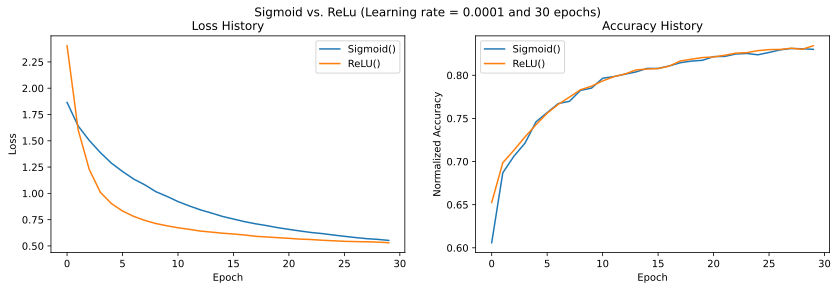

In [ ]:
# Model dimensions
D_in = 784
hidden_layer = 50
D_out= 10

lr = 0.0001
Nepoch = 30

# Figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for activation in [nn.Sigmoid(), nn.ReLU()]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                      activation,
                      nn.Linear(hidden_layer, D_out),
                      nn.LogSoftmax(dim=1))

  optimizer = th.optim.Adam(model.parameters(),lr=lr)
  loss_fn=nn.NLLLoss()

  loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

  axs[0].plot(loss_hist_cv, label=str(activation)) # Loss plot (cv)
  axs[1].plot(accuracy_hist, label=str(activation)) # Accuracy plot

graph_labels('Sigmoid vs. ReLu (Learning rate = 0.0001 and 30 epochs)')

---
> *As we can see, both of activations works well, but ReLu is softer in the sense that it didn't present oscillations in accuracy*
---

### Impact of the hidden layer size

> Run experiments with different hidden layer size, respectively : 50,100,150, 200 and 250. 
What do you observe ? 


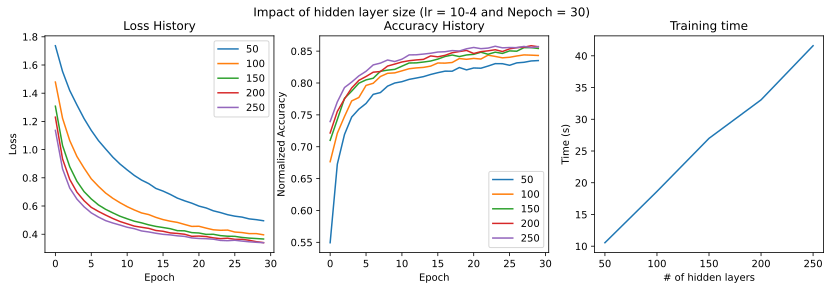

In [ ]:
#Model dimensions
D_in = 784
D_out= 10

lr = 0.0001
Nepoch = 30

# Figure for plotting
fig, axs = plt.subplots(1, 3, figsize=(14,4))
time_list = []

for hidden_layer in [50, 100, 150, 200, 250]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                      nn.Sigmoid(),
                      nn.Linear(hidden_layer, D_out),
                      nn.LogSoftmax(dim=1))

  optimizer = th.optim.Adam(model.parameters(),lr=lr)
  loss_fn=nn.NLLLoss()

  loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)
  time_list.append(time_trainig)

  axs[0].plot(loss_hist_train, label=str(hidden_layer))
  axs[1].plot(accuracy_hist, label=str(hidden_layer))

axs[2].plot([50, 100, 150, 200, 250], time_list)

axs[2].set_title('Training time')
axs[2].set(xlabel = '# of hidden layers')
axs[2].set(ylabel = 'Time (s)')


graph_labels('Impact of hidden layer size (lr = 10-4 and Nepoch = 30)')

---
> *We can see that as the size of the hidden layer increases, it takes more time to train the model.*

> *On the other hand, it reaches the plateau more fast*

> *However, the gain in accuracy is not so rewarding*
---

# Deeper network
---

> Now we add one more hidden layer and consider a NNet with two hidden layers. 
The first setup is: 
- two hidden layers of size 50 with a ReLU activation
- a learning rate of 0.0001

> Train it during 100 epochs 

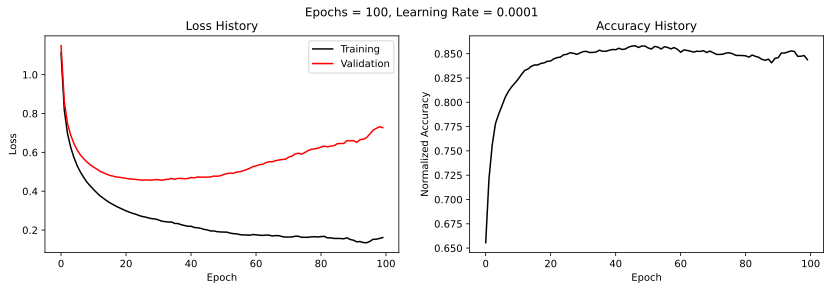

In [ ]:
# Model dimensions
D_in = 784
hidden_layer = 50
D_out= 10

lr = 0.0001
Nepoch = 100

# Model, loss function and optimizer
model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))

optimizer = th.optim.Adam(model.parameters(),lr=lr)
loss_fn=nn.NLLLoss()

# Training
loss_hist_train, loss_hist_cv, accuracy_hist, time_trainig = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

# Plotting
plt_learning_curves(loss_hist_train, loss_hist_cv, accuracy_hist, Nepoch = 100, lr = 0.0001)

## Dropout

> You should observe overfitting, one solution is to add a dropout layer to the model (with a probability of 0.2 for example). Code this modification and rerun the training process to observe the impact. When you use a Dropout layer, the layer acts differently in the train mode and evaluation mode. You should take this into account when you train the model end when you compute the performance on the validation set. 



> Try different value of dropout to assess its impact on the training process. For example 0.3 and 0.5. 

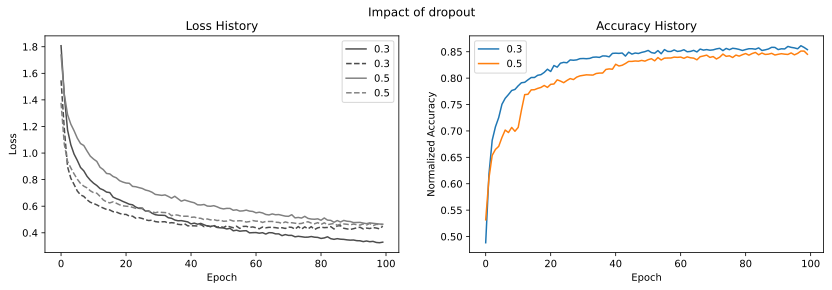

In [ ]:
# Model dimensions
D_in = 784
hidden_layer = 50
D_out= 10

lr = 0.0001
Nepoch = 100

# Figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for prob in [0.3, 0.5]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer),
                      nn.ReLU(),
                      nn.Dropout(prob),
                      nn.Linear(hidden_layer, hidden_layer),
                      nn.ReLU(),
                      nn.Linear(hidden_layer, D_out),
                      nn.LogSoftmax(dim=1))

  optimizer = th.optim.Adam(model.parameters(),lr=lr)
  loss_fn=nn.NLLLoss()

  loss_hist_train, loss_hist_cv, accuracy_hist, train_time = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

  axs[0].plot(loss_hist_train, label=str(prob), color=str(prob)) # Loss plot (train)
  axs[0].plot(loss_hist_cv, label=str(prob), color=str(prob), linestyle='dashed') # Loss plot (cv)
  axs[1].plot(accuracy_hist, label=str(prob)) # Accuracy plot

graph_labels('Impact of dropout')


---
> *We can see that the dropout can fix the overfit problem, but it didn't make a great change in the accuracy of the model*
---

> Then you can play with different  "hyper-parameters":
- Increase the size (double for example) of the first hidden layer
- Add a third hidden layer. 


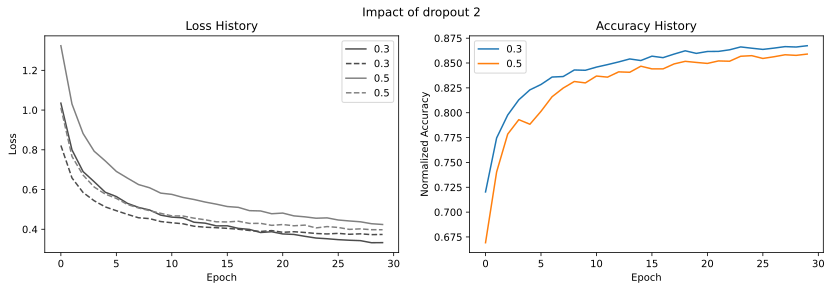

In [ ]:
# Model dimensions
D_in = 784

hidden_layer_1 = 100
hidden_layer_2 = 50
hidden_layer_3 = 50

D_out= 10

lr = 0.0001
Nepoch = 30

# Figure for plotting
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for prob in [0.3, 0.5]:
  model = nn.Sequential(nn.Linear(D_in,hidden_layer_1),
                      nn.ReLU(),
                      nn.Dropout(prob),
                      nn.Linear(hidden_layer_1, hidden_layer_2),
                      nn.ReLU(),
                      nn.Linear(hidden_layer_2, hidden_layer_3),
                      nn.ReLU(),
                      nn.Linear(hidden_layer_3, D_out),
                      nn.LogSoftmax(dim=1))

  optimizer = th.optim.Adam(model.parameters(),lr=lr)
  loss_fn=nn.NLLLoss()

  loss_hist_train, loss_hist_cv, accuracy_hist, train_time = train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

  axs[0].plot(loss_hist_train, label=str(prob), color=str(prob)) # Loss plot (train)
  axs[0].plot(loss_hist_cv, label=str(prob), color=str(prob), linestyle='dashed') # Loss plot (cv)
  axs[1].plot(accuracy_hist, label=str(prob)) # Accuracy plot

graph_labels('Impact of dropout 2')

# Confusion matrix
---

> For a good model you obtained, compute the confusion matrix and look at it. 


In [ ]:
### Defining and training the model

# Dimensions
D_in = 784
hidden_layer_1 = 100
hidden_layer_2 = 50
hidden_layer_3 = 50
D_out= 10

# Learning rate, dropout prob. and #epochs
lr = 0.0001
prob = 0.3
Nepoch = 100

# Model, optimizer and loss function
model = nn.Sequential(nn.Linear(D_in,hidden_layer_1),
                    nn.ReLU(),
                    nn.Dropout(prob),
                    nn.Linear(hidden_layer_1, hidden_layer_2),
                    nn.ReLU(),
                    nn.Linear(hidden_layer_2, hidden_layer_3),
                    nn.ReLU(),
                    nn.Linear(hidden_layer_3, D_out),
                    nn.LogSoftmax(dim=1))

optimizer = th.optim.Adam(model.parameters(),lr=lr)

loss_fn=nn.NLLLoss()

### Training the model
train(model, optimizer, loss_fn, Xtrain, Ytrain, Xvalid, Yvalid, epochs=Nepoch)

### Predicting the class and creating the validation array
logprobs_cv = model(Xvalid)
prob_predict, class_predict = logprobs_cv.topk(1)
class_predict, true_class = class_predict.numpy().reshape((10000,)), Yvalid.numpy().reshape(10000,)
plt.show()

# PCA 
---
> To analyse the results, beyond the confusion matrix, we can compute the PCA (in 2D) and plot the projected datapoints depending on their classes, for instance by considering every pairs of classes. To compute the PCA and project the data, we can use the implementation provided by sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

In [ ]:
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA

sns.set_style("darkgrid")

# Initialize PCA object
pca = PCA(n_components=2)

# Fit PCA to normalized data with no components
fitted_2D = pca.fit_transform(Xtrain)

plt.figure(figsize=(10,5))
lw = 2

sc = plt.scatter(fitted_2D.T[0], fitted_2D.T[1], c=Ytrain, cmap=plt.cm.gist_rainbow, alpha=1, lw=lw)
clb = plt.colorbar(sc)
clb.ax.set_title('Class', fontsize=15)
plt.xlabel("1st PC", fontsize=12)
plt.ylabel("2nd PC", fontsize=12)
plt.title('2D PCA of Fashion-MNIST dataset (cv)', fontweight = 'bold', fontsize=15)

plt.show()
